# Lesson 04: Classification Performance ROCs

- evaluating and comparing trained models is of extreme importance when deciding in favor/against
  + model architectures
  + hyperparameter sets
  
- evaluating performance or quality of prediction is performed with a myriad of tests, figure-of-merits and even statistical hypothesis testing
- in the following, the rather popular "Receiver Operating Characteristic" curve (spoken ROC curve)
- the ROC was invented in WWII by radar engineers when seeking to detect enemy vessels and comparing different devices/techniques


## preface
- two main ingredients to ROC:

    + TPR = True Positive Rate
    + FPR = False Positive Rate
    

![from Wikipedia, ROC article](https://raw.githubusercontent.com/deeplearning540/lesson04/main/images/Screenshot_2021-02-24-Wikipedia-ROC.png)

- $TPR = \frac{TP}{TP+FN}$ also known as `recall`, always within $[0,1]$
- $FPR = \frac{FP}{FP+TN}$ also known as `fall-out`, always within $[0,1]$

## Data

For the following, I will rely (again) on the Palmer penguin dataset obtained from [this repo](https://github.com/allisonhorst/palmerpenguins). To quote the repo:

> Data were collected and made available by [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php)
> and the [Palmer Station, Antarctica LTER](https://pal.lternet.edu/), a member of the [Long Term Ecological Research Network](https://lternet.edu/).


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv")
#let's remove the rows with NaN values
df = df[ df.bill_length_mm.notnull() ]
#convert species column to 
df[["species_"]] = df[["species"]].astype("category")


In [3]:
print(df.shape)
print((df.species_.cat.codes < 1).shape)

#create binary column
df["is_adelie"] = (df.species_.cat.codes < 1).astype(np.int8)

print(df.head())


(342, 9)
(342,)
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  year species_  is_adelie  
0       3750.0    male  2007   Adelie          1  
1       3800.0  female  2007   Adelie          1  
2       3250.0  female  2007   Adelie          1  
4       3450.0  female  2007   Adelie          1  
5       3650.0    male  2007   Adelie          1  


In [4]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
print(f'seaborn version: {sns.__version__}')

seaborn version: 0.10.1


In [5]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import train_test_split

kmeans = knn(n_neighbors=5)

In [6]:
#this time we train the knn algorithm, i.e. an unsupervised method is used in a supervised fashion
#prepare the data
X = np.stack((df.bill_length_mm, df.flipper_length_mm), axis=-1)
y = df.is_adelie

print(X.shape)
print(y.shape)


(342, 2)
(342,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = .15,
                                                    random_state = 20210303)

print(X_train.shape)
print(y_train.shape)


print(X_test.shape)
print(y_test.shape)



(290, 2)
(290,)
(52, 2)
(52,)


In [8]:
kmeans = kmeans.fit(X_train, y_train)


In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_hat = kmeans.predict(X_test)

cm = confusion_matrix( y_test, y_test_hat )

print(cm)


[[26  1]
 [ 3 22]]


1


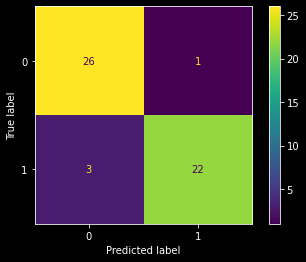

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(int(True))

# Further Reading

- some parts of this material were inspired by [Sebastian Raschka](https://sebastianraschka.com)
  + [lecture 12.4, Receiver Operating Curve](https://youtu.be/GdSEkiArM3k)
  
- a generally good resource 
  + [Confusion_matrix](https://en.wikipedia.org/wiki/Confusion_matrix)
  
- all of the above is nicely implemented and documented 
  + [sklearn examples](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py)
  + [roc_curve API docs](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve)

- [extensive discussion of ROC](https://stackabuse.com/understanding-roc-curves-with-python/)
  